In [1]:
import pdal

/Users/adam/anaconda3/envs/pdal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import shapely
import json
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


/Users/adam/anaconda3/envs/pdal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline

In [4]:
workingfile = "../../sample-data/T_316000_235500.laz"

In [5]:
pipelineJson = {
  "pipeline": [ workingfile,
    {
        "type":"filters.mortonorder",
        "reverse":"false"
    },
    {
        "type": "filters.voxelgrid"
    }
  ]
}

In [6]:
pipeline = pdal.Pipeline(json.dumps(pipelineJson))
pipeline.validate() # check if our JSON and options were good
pipeline.loglevel = 8 #really noisy
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

In [7]:
# Load Pipeline output in python objects
arr = pipeline.arrays[0]
description = arr.dtype.descr
cols = [col for col, __ in description]
df = pd.DataFrame({col: arr[col] for col in cols})

In [8]:
df

,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,ScanAngleRank,UserData,PointSourceId,GpsTime
0,316118.711997,235508.521000,-71.555000,0,0,0,0,0,0,0.0,0,0,0.0
1,316266.109007,235846.769012,-62.618000,0,0,0,0,0,0,0.0,0,0,0.0
2,316266.276671,235846.485352,-62.843667,0,0,0,0,0,0,0.0,0,0,0.0
3,316438.570662,235613.744324,-34.115665,0,0,0,0,0,0,0.0,0,0,0.0
4,316209.903243,235619.699997,-32.637001,0,0,0,0,0,0,0.0,0,0,0.0
5,316209.874007,235620.093002,-32.602001,0,0,0,0,0,0,0.0,0,0,0.0
6,316209.602995,235619.696999,-32.529998,0,0,0,0,0,0,0.0,0,0,0.0
7,316408.652663,235647.614990,-32.465999,0,0,0,0,0,0,0.0,0,0,0.0
8,316220.766005,235604.797997,-27.619999,0,0,0,0,0,0,0.0,0,0,0.0
9,316407.768996,235652.843994,-27.688999,0,0,0,0,0,0,0.0,0,0,0.0


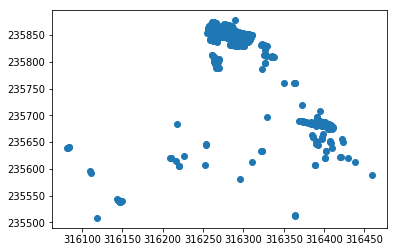

In [9]:
plt.plot(df.X[0:1000], df.Y[0:1000], 'o')


In [10]:
X,Y,Z = np.meshgrid(df.X[0:1000], df.Y[0:1000], df.Z[0:1000])


In [12]:
voxels = [X , Y , Z]

In [13]:
colors = np.empty(voxels.shape, dtype=object)
colors[:] = 'gray'
colors.shape

AttributeError: 'list' object has no attribute 'shape'

ValueError: Argument filled must be 3-dimensional

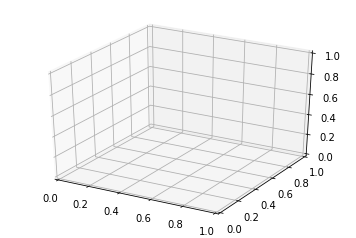

In [94]:
# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k' )


plt.show()